#### Goal
- Deciding when to send push notifications for sale coupons
    - Finding the time when most orders are placed
    
#### Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
COLORS = sns.color_palette()
import matplotlib.pyplot as plt

%matplotlib inline

#### Load data

In [2]:
retail = pd.read_csv('../output/OnlineRetailClean.csv', parse_dates=['InvoiceDate'])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.299999
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340000


In [3]:
def plot_bar(df, xlabel, ylabel, title, figsize=(20,10), color=COLORS[0], rotation=45):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.bar(df.index, df, color=color)
    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=13)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.index, rotation=rotation)

#### Find the time when most orders are placed

In [4]:
order_by_hour = retail.set_index('InvoiceDate').groupby(lambda x: x.hour).count()['CustomerID']
order_by_hour

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

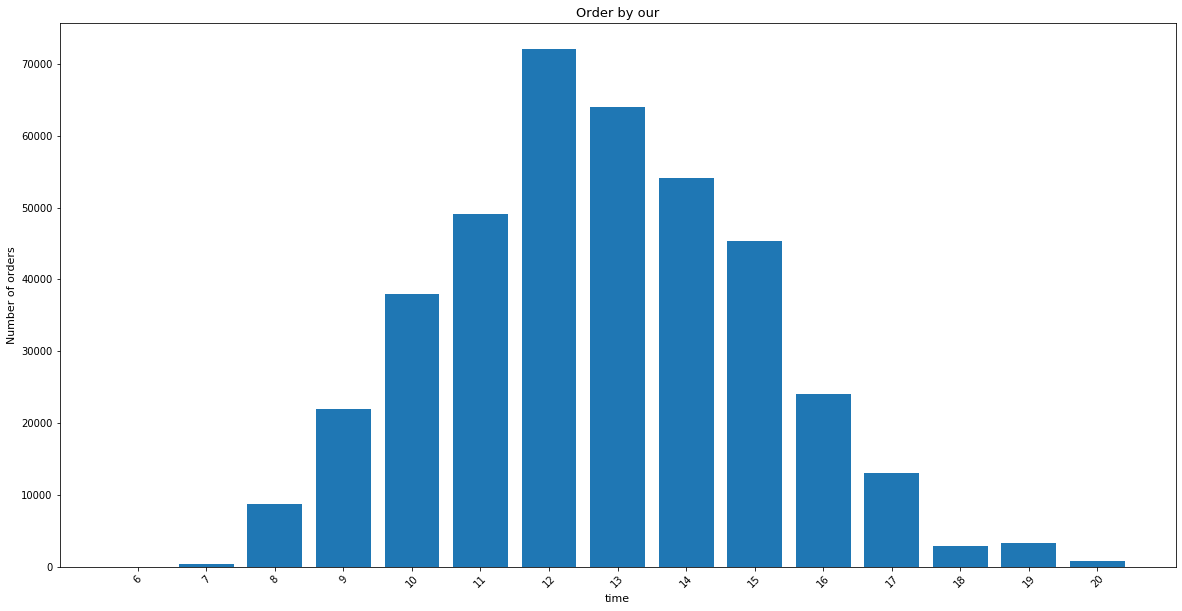

In [5]:
plot_bar(order_by_hour, 'time', 'Number of orders', 'Order by our')

In [6]:
def half_hour(date):
    if date.minute > 30:
        minute = '30'
    else:
        minute = '00'
    return '{:2d}:{}'.format(date.hour, minute)

In [7]:
order_by_half_hour = retail.set_index('InvoiceDate').groupby(half_hour).count()['CustomerID']
order_by_half_hour

 6:00        1
 7:30      379
 8:00     3145
 8:30     5545
 9:00     9364
 9:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

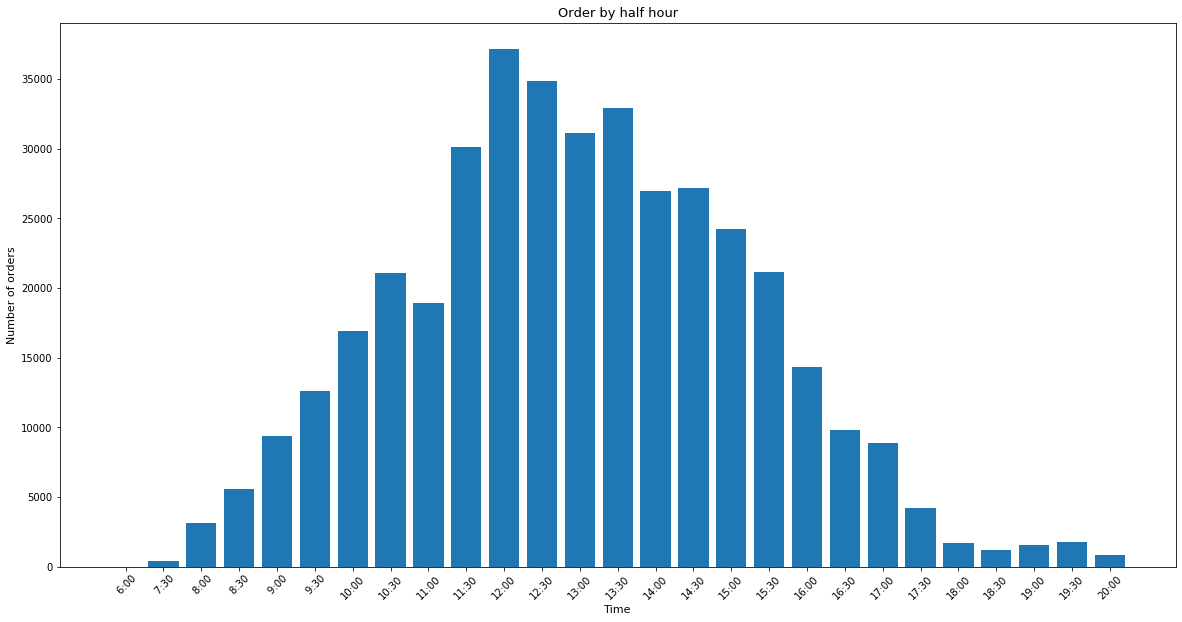

In [8]:
plot_bar(order_by_half_hour, 'Time', 'Number of orders', 'Order by half hour')

12:00 is roughly when the most orders are placed.

#### Personalized push notification
- Send push notifications based on each customer's most using time

In [9]:
order_by_customer_time = retail.set_index('InvoiceDate').groupby(['CustomerID', lambda x: x.hour]).count()['StockCode']
order_by_customer_time

CustomerID    
12346       10      1
12347       8      22
            10     24
            12     47
            13     18
            14     60
            15     11
12348       10     11
            13      3
            19     17
12349       9      73
12350       16     17
12352       12     15
            14     52
            15      3
            16     15
12353       17      4
12354       13     58
12355       13     13
12356       8       2
            9      36
            12     21
12357       16    131
12358       10     19
12359       12    168
            14     80
12360       9      45
            10     30
            15     54
12361       13     10
                 ... 
18265       15     29
18268       19      1
18269       13      7
18270       12      5
            13      6
18272       9      33
            11     29
            12     45
            15     37
            18     22
18273       11      2
            13      1
18274       17     11
18276       10   

#### Find the time with maximum number of orders for each customer

In [10]:
idx = order_by_customer_time.groupby('CustomerID').idxmax()

In [11]:
result = order_by_customer_time.loc[idx]
result

CustomerID    
12346       10      1
12347       14     60
12348       19     17
12349       9      73
12350       16     17
12352       14     52
12353       17      4
12354       13     58
12355       13     13
12356       9      36
12357       16    131
12358       10     19
12359       12    168
12360       15     54
12361       13     10
12362       15     60
12363       13     16
12364       15     56
12365       13     21
12367       16     11
12370       12    131
12371       10     63
12372       12     33
12373       13     14
12374       15     33
12375       14     11
12377       9      43
12378       10    219
12379       10     20
12380       11     40
                 ... 
18242       13     44
18245       14    110
18246       11      2
18248       13     28
18249       15      8
18250       13     21
18251       15     16
18252       12     95
18255       13      6
18257       14     75
18259       14     21
18260       10     55
18261       9      15
18262       16   

In [12]:
groups_by_hour = result.reset_index().groupby('level_1').groups

In [13]:
hr = 7 # Select hour
groups_by_hour[hr]

Int64Index([73, 269, 319, 344, 375, 893, 1667, 2317], dtype='int64')